In [1]:
#SVM

In [1]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [3]:
#Get data from pre processing
data = np.load("brain_mri_preprocessed.npz")
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (5521, 16384), Test shape: (1205, 16384)


In [4]:
# Train and compare SVM kernels

kernels = ['linear', 'rbf', 'poly']
results = []

print("Training and evaluating SVM kernels...\n")

for kernel in kernels:
    print(f"Training SVM with kernel = '{kernel}' ...")
    
    # Choose gamma only when needed
    gamma_value = 0.01 if kernel != 'linear' else 'scale'
    clf = SVC(kernel=kernel, C=1, gamma=gamma_value)
    clf.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print summary for each kernel
    print(f" Kernel: {kernel}")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall   : {rec:.4f}")
    print(f"   F1-score : {f1:.4f}\n")
    
    results.append((kernel, acc, prec, rec, f1))

# Create styled table
df_results = pd.DataFrame(results, columns=["Kernel", "Accuracy", "Precision", "Recall", "F1-score"])
print("Final Comparison Table:")
display(
    df_results.style
    .background_gradient(subset=["Accuracy", "Precision", "Recall", "F1-score"], cmap="Blues")
    .format({"Accuracy": "{:.3f}", "Precision": "{:.3f}", "Recall": "{:.3f}", "F1-score": "{:.3f}"})
)

Training and evaluating SVM kernels...

Training SVM with kernel = 'linear' ...
 Kernel: linear
   Accuracy : 0.9925
   Precision: 0.9989
   Recall   : 0.9911
   F1-score : 0.9950

Training SVM with kernel = 'rbf' ...
 Kernel: rbf
   Accuracy : 0.7602
   Precision: 0.7561
   Recall   : 1.0000
   F1-score : 0.8611

Training SVM with kernel = 'poly' ...
 Kernel: poly
   Accuracy : 0.9942
   Precision: 0.9978
   Recall   : 0.9944
   F1-score : 0.9961

Final Comparison Table:


,Kernel,Accuracy,Precision,Recall,F1-score
0,linear,0.993,0.999,0.991,0.995
1,rbf,0.760,0.756,1.000,0.861
2,poly,0.994,0.998,0.994,0.996


Testing SVM (Polynomial kernel) with different C, gamma, and degree values...

Training model with C=0.1, gamma=0.001, degree=2 ...
Done: Accuracy = 99.59%

Training model with C=0.1, gamma=0.001, degree=3 ...
Done: Accuracy = 99.42%

Training model with C=0.1, gamma=0.001, degree=4 ...
Done: Accuracy = 99.34%

Training model with C=0.1, gamma=0.01, degree=2 ...
Done: Accuracy = 99.59%

Training model with C=0.1, gamma=0.01, degree=3 ...
Done: Accuracy = 99.42%

Training model with C=0.1, gamma=0.01, degree=4 ...
Done: Accuracy = 99.34%

Training model with C=0.1, gamma=0.1, degree=2 ...
Done: Accuracy = 99.59%

Training model with C=0.1, gamma=0.1, degree=3 ...
Done: Accuracy = 99.42%

Training model with C=0.1, gamma=0.1, degree=4 ...
Done: Accuracy = 99.34%

Training model with C=1, gamma=0.001, degree=2 ...
Done: Accuracy = 99.59%

Training model with C=1, gamma=0.001, degree=3 ...
Done: Accuracy = 99.42%

Training model with C=1, gamma=0.001, degree=4 ...
Done: Accuracy = 99.34%



,C,Gamma,Degree,Accuracy
0,0.100000,0.001000,2,0.996
1,0.100000,0.001000,3,0.994
2,0.100000,0.001000,4,0.993
3,0.100000,0.010000,2,0.996
4,0.100000,0.010000,3,0.994
5,0.100000,0.010000,4,0.993
6,0.100000,0.100000,2,0.996
7,0.100000,0.100000,3,0.994
8,0.100000,0.100000,4,0.993
9,1.000000,0.001000,2,0.996


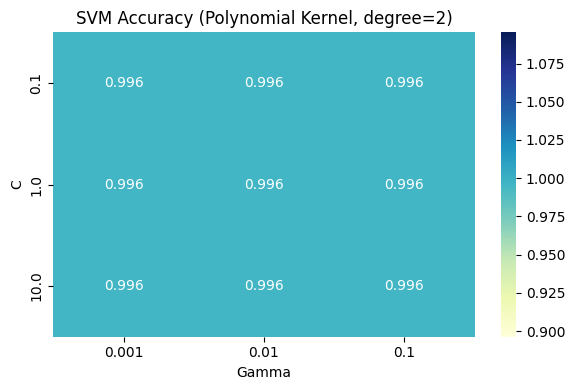

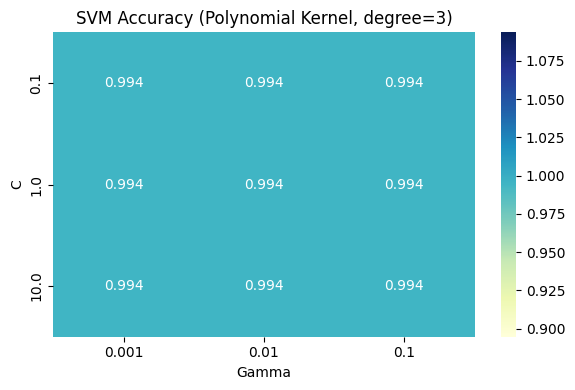

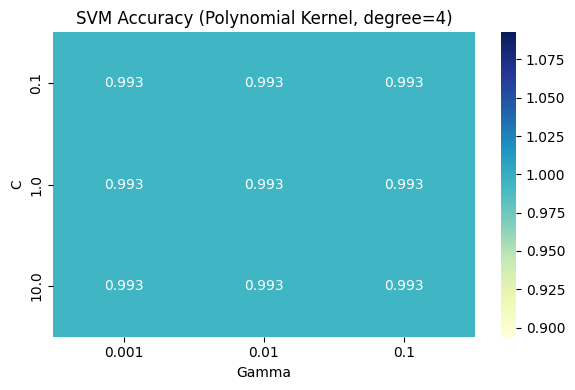

In [5]:
# Test different hyperparameters for Polynomial kernel
grid = []
print("Testing SVM (Polynomial kernel) with different C, gamma, and degree values...\n")

for C in [0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1]:
        for degree in [2, 3, 4]:
            print(f"Training model with C={C}, gamma={gamma}, degree={degree} ...")
            
            clf = SVC(kernel='poly', C=C, gamma=gamma, degree=degree)
            clf.fit(X_train_scaled, y_train)
            acc = clf.score(X_test_scaled, y_test)
            
            print(f"Done: Accuracy = {acc*100:.2f}%\n")
            grid.append((C, gamma, degree, acc))

# Create DataFrame
df_grid = pd.DataFrame(grid, columns=["C", "Gamma", "Degree", "Accuracy"])

print("Summary of tested hyperparameters:")
display(
    df_grid.style.background_gradient(subset=["Accuracy"], cmap="YlGnBu")
    .format({"Accuracy": "{:.3f}"})
)

# Plot heatmap per degree
for degree in sorted(df_grid["Degree"].unique()):
    plt.figure(figsize=(6,4))
    data = df_grid[df_grid["Degree"] == degree]
    pivot = data.pivot(index="C", columns="Gamma", values="Accuracy")
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title(f"SVM Accuracy (Polynomial Kernel, degree={degree})")
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.tight_layout()
    plt.show()

In [4]:
# Train best model (Polynomial Kernel)
best_svm = SVC(kernel='poly', C=0.1, gamma=0.001, degree=2)
best_svm.fit(X_train_scaled, y_train)
y_pred = best_svm.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nBest SVM (Polynomial Kernel) Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")


Best SVM (Polynomial Kernel) Results:
Accuracy:  0.9959
Precision: 0.9978
Recall:    0.9967
F1-score:  0.9972


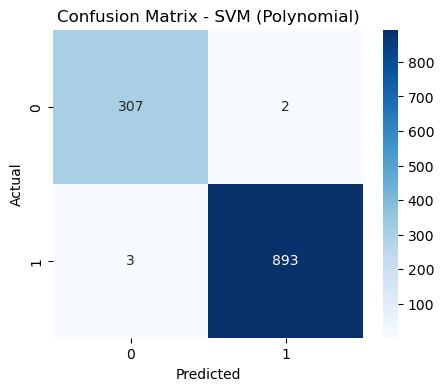

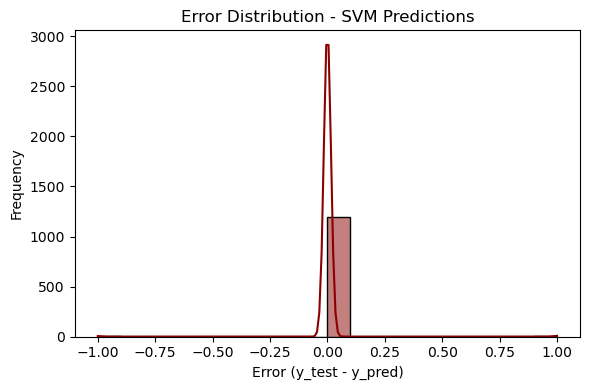

In [5]:
# Confusion Matrix and Error Distribution
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Polynomial)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Error distribution
errors = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=20, kde=True, color='darkred')
plt.title("Error Distribution - SVM Predictions")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

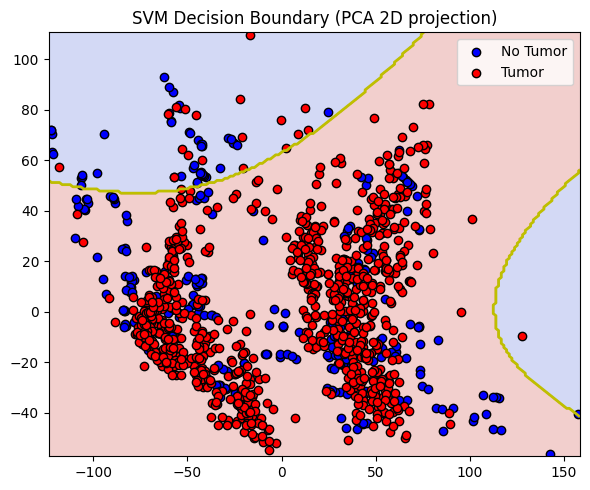

In [8]:
# PCA Visualization (2D Projection)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf_pca = SVC(kernel='poly', C=1, gamma=0.01)
clf_pca.fit(X_train_pca, y_train)

# Decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0.5], colors='y', linewidths=2)
plt.scatter(X_test_pca[y_test==0, 0], X_test_pca[y_test==0, 1], c='b', label='No Tumor', edgecolors='k')
plt.scatter(X_test_pca[y_test==1, 0], X_test_pca[y_test==1, 1], c='r', label='Tumor', edgecolors='k')
plt.legend()
plt.title("SVM Decision Boundary (PCA 2D projection)")
plt.tight_layout()
plt.show()

In [9]:
print(f"""
SVM Model Summary
--------------------------
Kernel: Polynomial
C: 1
Gamma: 0.01
Train Samples: {X_train.shape[0]}
Test Samples: {X_test.shape[0]}
Features: {X_train.shape[1]}

Accuracy:  {acc:.4f}
Precision: {prec:.4f}
Recall:    {rec:.4f}
F1-score:  {f1:.4f}
""")


SVM Model Summary
--------------------------
Kernel: Polynomial
C: 1
Gamma: 0.01
Train Samples: 5521
Test Samples: 1205
Features: 16384

Accuracy:  0.9959
Precision: 0.9978
Recall:    0.9967
F1-score:  0.9972



In [10]:
results = {
    "Model": "SVM (polynomial)",
    "Accuracy": round(acc, 4),
    "Precision": round(prec, 4),
    "Recall": round(rec, 4),
    "F1": round(f1, 4)
}

with open("results_svm.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ Saved Logistic Regression results to 'results_svm.json'")

✅ Saved Logistic Regression results to 'results_svm.json'
